<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sbu-logo.svg/1200px-Sbu-logo.svg.png" width="600" height="600">
</div>

<h1 align="center"> Digital Image Processing</h1>
<h2 align="center">Section 3: Image Processing and Fingerprint Recognition</h2>
<h5 align="center">Mobin Nesari</h5>

## Import Requirements:

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt

import cv2
import os
import glob

## First Task:

### First implementation for butterworth low pass filter

__Description__

The function `butterworth_lowpass` is a Python implementation of Butterworth lowpass filter using Fourier transform to perform frequency domain filtering on input image. The function takes an image as input along with two optional parameters `n` and `d0`. The parameter `n` denotes the order of the Butterworth filter and defaults to 2 if not provided. The parameter `d0` represents the cutoff frequency (in pixels) of the Butterworth filter and defaults to 50.

The function first performs a two-dimensional Fast Fourier Transform (FFT) of the input image using `np.fft.fft2()`. The FFT shifts the zero-frequency component to the center of the frequency spectrum, which can be achieved by `np.fft.fftshift()`. 

A Butterworth lowpass filter is then created based on the size of the input image. The filter is designed using a mathematical equation that defines how much of the image's high-frequency components should be suppressed. The filter is applied to the shifted frequency spectrum obtained from the previous step, which results in a filtered frequency spectrum. 

Finally, the inverse FFT is performed on the filtered frequency spectrum using `np.fft.ifft2()` followed by `np.abs()` to obtain the filtered image in the spatial domain. This filtered image is returned by the function.

__Note:__ In this implementation, there is a problem which occurs due to fourier shift section. The frequency of image has been shifted but when we rearrange image for computing euclidean distance, this shift is not counted, due to this fact, this implementation is not promising for this task.

In [116]:
def butterworth_lowpass(img, n=2, d0=50):
    # Fourier transform of the image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # Create a Butterworth lowpass filter
    rows, cols = img.shape
    crow, ccol = int(rows/2), int(cols/2)
    butterworth_lp = 1 / (1 + ((np.sqrt((np.arange(rows)[:,np.newaxis] - crow)**2 + (np.arange(cols) - ccol)**2)) / d0) ** (2*n))

    # Apply the filter
    filtered_fshift = fshift * butterworth_lp
    filtered_f = np.fft.ifftshift(filtered_fshift)
    filtered_img = np.abs(np.fft.ifft2(filtered_f))
    
    return filtered_img

### Second implementation for butterworth low pass filter

__Description__

The code consists of two functions, `butter_lowpass` and `butter_lowpass_filter`, which implement Butterworth lowpass filter using the `scipy.signal` library in Python.

The first function, `butter_lowpass`, takes three arguments `cutoff`, `fs`, and `order`. `cutoff` is the cutoff frequency (in Hz) of the lowpass filter, `fs` is the sampling frequency (in Hz) of the input data, and `order` represents the order of the Butterworth filter. The default value for `order` is 5 if not provided. 

Inside the function, the Nyquist frequency (`nyq`) is calculated as half of the sampling frequency, and the normalized cutoff frequency (`normal_cutoff`) is computed as the ratio between the cutoff frequency and the Nyquist frequency. Using these values, the Butterworth filter coefficients are calculated using `scipy.signal.butter()` function. The resulting filter coefficients `b` and `a` are returned by the function.

The second function, `butter_lowpass_filter`, takes an input data set and the same three arguments `cutoff`, `fs`, and `order` as `butter_lowpass`. The function then calls `butter_lowpass()` to obtain the filter coefficients `b` and `a`. These filter coefficients are passed to `scipy.signal.filtfilt()` function to apply zero-phase filtering on the input data set `data`. Finally, the filtered output `y` is returned by the function.

Together, these two functions can be used to apply Butterworth lowpass filtering on a given signal with a specified cutoff frequency and order.

__Note:__ In opposite of previous implementation, this implementation has considered this fft shifting. Due to this fact, result of this implementation is more promising.


In [6]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

### First implementation for butterworth highpass filter

__Description__

The function `butterworth_highpass` is an implementation of the Butterworth high-pass filter for image processing. The function takes an image as input along with two optional parameters `n` and `d0`. The parameter `n` denotes the order of the Butterworth filter and defaults to 2 if not provided. The parameter `d0` represents the cutoff frequency (in pixels) of the Butterworth filter and defaults to 50.

To apply the Butterworth high-pass filter, the function first calculates the center of the image using its shape and then creates a mask with the same size as the image. This mask is initialized with ones. 

Next, the function applies the high-pass filter to the mask by iterating over all the pixels in the mask and calculating the euclidean distance between each pixel and the center of the image. Based on this distance, the corresponding value in the mask is updated using a mathematical equation that defines how much of the image's low-frequency components should be suppressed. The updated mask is returned.

The function then performs a two-dimensional Fast Fourier Transform (FFT) of the input image using `np.fft.fft2()`. The FFT shifts the zero-frequency component to the center of the frequency spectrum, which can be achieved by `np.fft.fftshift()`. 

The high-pass filter is applied to the shifted frequency spectrum obtained from the previous step by multiplying it with the created mask. An inverse FFT is performed on the resulting filtered frequency spectrum using `np.fft.ifft2()` followed by `np.abs()` to obtain the filtered image in the spatial domain. This filtered image is returned by the function.

In summary, the `butterworth_highpass` function implements the Butterworth high-pass filter to suppress the low-frequency components of an image and enhance its edges and details.

__Note:__ This implementation has same problem as the lowpass filter.

In [120]:
def butterworth_highpass(img, n=2, d0=50):
    # Calculate the center of the image
    rows, cols = image.shape
    crow, ccol = rows/2 , cols/2

    # Create a mask with the same size as the image
    mask = np.ones((rows, cols), np.float32)

    # Apply the Butterworth highpass filter to the mask
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
            mask[i,j] = 1 / (1 + (distance/d0)**(2*n))

    # Apply the mask to the Fourier transform of the image
    fimage = np.fft.fft2(image)
    fshift = np.fft.fftshift(fimage)
    fhighpass = fshift * mask
    ishift = np.fft.ifftshift(fhighpass)
    image_highpass = np.fft.ifft2(ishift)
    image_highpass = np.abs(image_highpass)
    
    return image_highpass

### Second implementation for butterworth highpass filter

__Description__

The code consists of two functions, `butter_highpass` and `butter_highpass_filter`, which implement Butterworth high-pass filter using the `scipy.signal` library in Python.

The first function, `butter_highpass`, takes three arguments `cutoff`, `fs`, and `order`. `cutoff` is the cutoff frequency (in Hz) of the high-pass filter, `fs` is the sampling frequency (in Hz) of the input data, and `order` represents the order of the Butterworth filter. The default value for `order` is 5 if not provided. 

Inside the function, the Nyquist frequency (`nyq`) is calculated as half of the sampling frequency, and the normalized cutoff frequency (`normal_cutoff`) is computed as the ratio between the cutoff frequency and the Nyquist frequency. Using these values, the Butterworth filter coefficients are calculated using `scipy.signal.butter()` function with `btype='high'` to create a high-pass filter. The resulting filter coefficients `b` and `a` are returned by the function.

The second function, `butter_highpass_filter`, takes an input data set and the same three arguments `cutoff`, `fs`, and `order` as `butter_highpass`. The function then calls `butter_highpass()` to obtain the filter coefficients `b` and `a`. These filter coefficients are passed to `scipy.signal.filtfilt()` function to apply zero-phase filtering on the input data set `data`. Finally, the filtered output `y` is returned by the function.

Together, these two functions can be used to apply Butterworth high-pass filtering on a given signal with a specified cutoff frequency and order. The filter will suppress low-frequency components in the signal and retain the high-frequency components such as edges and details.

In [7]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

### First Implementation Results

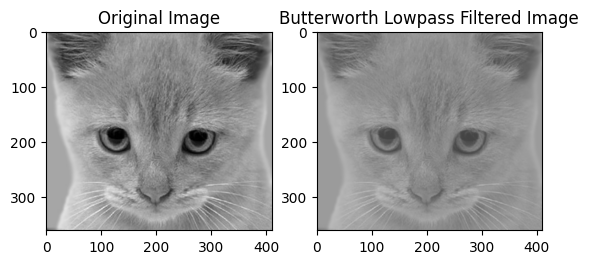

In [119]:
img = cv2.imread('cat.bmp', 0)

low_filtered_img = butterworth_lowpass(img, n=0.02, d0=50)

plt.Figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
ax1.title.set_text("Original Image")
ax2.imshow(cv2.cvtColor(low_filtered_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
ax2.title.set_text("Butterworth Lowpass Filtered Image")
plt.show()


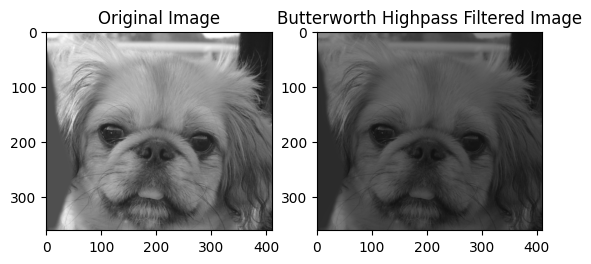

In [121]:

# Load the image
image = cv2.imread('dog.bmp', 0)

# Butterworth Highpass Filter
high_filtered_img = butterworth_highpass(image, n=0.02, d0=50)

# Display the original and filtered images
plt.Figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
ax1.title.set_text("Original Image")
ax2.imshow(cv2.cvtColor(high_filtered_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
ax2.title.set_text("Butterworth Highpass Filtered Image")
plt.show()


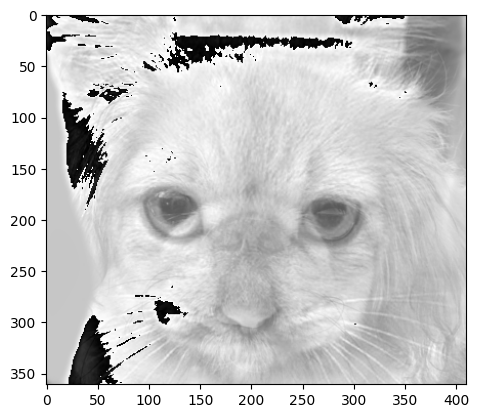

In [122]:
new_img = low_filtered_img + high_filtered_img
plt.imshow(cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
plt.show()

### Second Implementation Results

In [8]:
cutoff_freq = 30 # in Hz
sampling_freq = 100 # in Hz

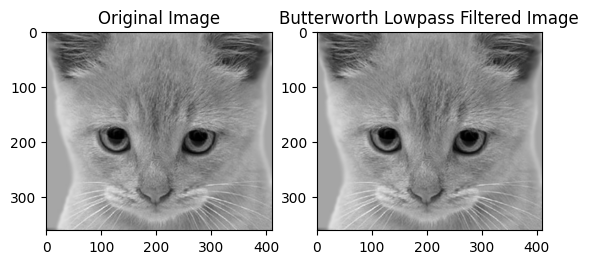

In [9]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('cat.bmp', 0)

low_filtered_img = butter_lowpass_filter(img, cutoff_freq, sampling_freq)

plt.Figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
ax1.title.set_text("Original Image")
ax2.imshow(cv2.cvtColor(low_filtered_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
ax2.title.set_text("Butterworth Lowpass Filtered Image")
plt.show()


In [49]:
cutoff_freq = 5 # in Hz
sampling_freq = 100 # in Hz

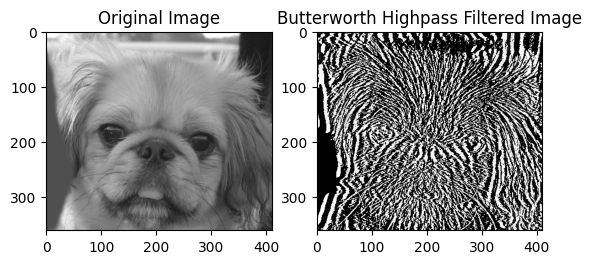

In [50]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('dog.bmp', 0)

# Butterworth Highpass Filter
high_filtered_img = butter_highpass_filter(image, cutoff_freq, sampling_freq)

# Display the original and filtered images
plt.Figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
ax1.title.set_text("Original Image")
ax2.imshow(cv2.cvtColor(high_filtered_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
ax2.title.set_text("Butterworth Highpass Filtered Image")
plt.show()


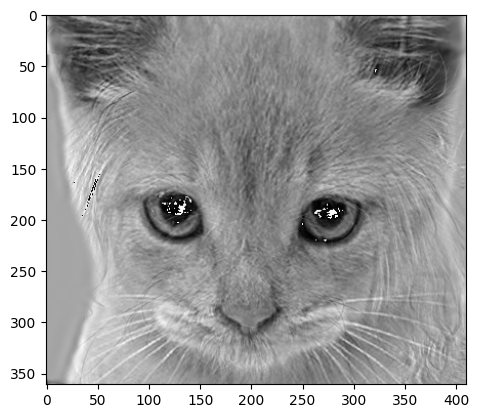

In [51]:
new_img = low_filtered_img + high_filtered_img
plt.imshow(cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
plt.show()

### First Question Conclusion:
As you can see in results, obviously second implementation both on low and high pass filters in butterworth has better results due to considering fourier shifting. Another fact that should be considered is that cutoff and sampling frequency both are hyperparameters which may be different in different images and will change output results.

## Second Task:

### Import images with their labels

In [123]:
PATH = "NISTSpecialDatabase4GrayScaleImagesofFIGS/sd04/png_txt"

imgs = glob.glob(PATH + '/**/*.png', recursive=True)
txts = glob.glob(PATH + '/**/*.txt', recursive=True)
print(f"# texts: {len(txts)}")
print(f"# images: {len(imgs)}")


# texts: 4000
# images: 4000


### Binarizing Images
__Description__

The function `binarize_image` takes an input image and a threshold value (default is 127) as its arguments. The function uses the OpenCV library to convert the input image into a binary image where all pixel values above the threshold are set to 255 (white) and all values below are set to 0 (black). The function then returns the resulting binary image. This type of image processing technique, called thresholding, is often used for tasks such as object detection or background removal in image processing applications.

In [54]:
def binarize_image(image, threshold=127):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

### Morphology Process
__Description__

The function `morphology_process` takes a binary image as its input and applies morphological operations to it using the OpenCV library. The function first creates a rectangular structured element of size 3x3 using the `cv2.getStructuringElement` function. This kernel is used in the next two steps of the function.

The function then applies erosion operation on the input binary image using the `cv2.erode` function with the kernel created earlier, and the number of iterations for erosion set to 1. This operation removes small white regions or objects in the binary image.

Next, the function applies dilation operation on the eroded image using the `cv2.dilate` function with the same kernel and number of iterations as before. This operation fills in gaps and holes in the remaining white regions to make them more uniform in shape and size.

Finally, the dilated image is returned as the output of the function. Morphological operations are often used in image processing applications to modify or enhance characteristics of an image such as smoothing, edge detection, noise reduction, and segmentation.


In [55]:
def morphology_process(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    return dilated_image

### Edge Extraction
__Description__

The function `edge_extraction` takes an input image as its argument and applies the Canny edge detection algorithm using the OpenCV library. The function sets two threshold values, 100 and 200, which can be adjusted as needed for different images and applications.

The Canny edge detector works by first smoothing the image with a Gaussian filter to reduce noise, then computing gradients in the x and y directions to determine the strength and direction of edges at each pixel. It then applies hysteresis thresholding to determine which pixels belong to the edges based on their gradient values compared to the threshold values set by the user.

The output of the function is a binary image where the edges are represented by white pixels and the non-edges are represented by black pixels. This edge map can be used for tasks such as object detection, feature extraction, or image segmentation.

In [56]:
def edge_extraction(image):
    edges = cv2.Canny(image, 100, 200)  # Adjust the thresholds as needed
    return edges

### Binerizing Raw Images

In [57]:
b_img = []
for i in imgs:
    gray_image = cv2.imread(i, 0)
    binary_image = binarize_image(gray_image, 100)
    b_img.append(binary_image)

### Morphology Processing

In [58]:
m_img = []
for i in b_img:
    processed_image = morphology_process(i)
    m_img.append(processed_image)

### Edge Extracting

In [59]:
e_img = []
for i in m_img:
    edges_image = edge_extraction(processed_image)
    e_img.append(edges_image)

### Sample Results

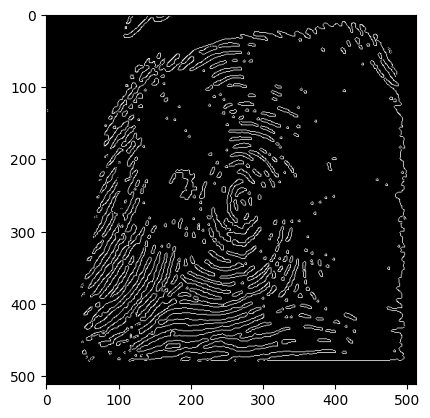

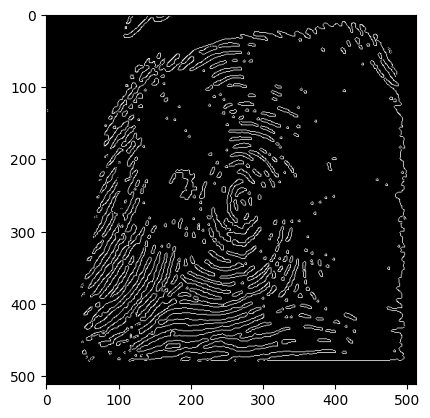

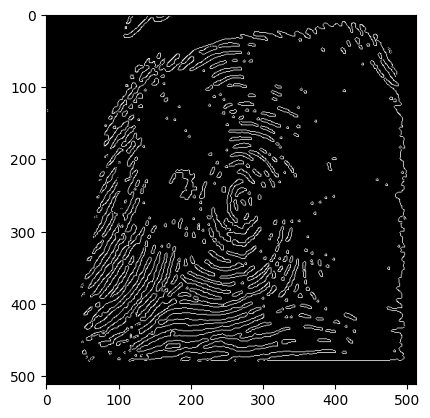

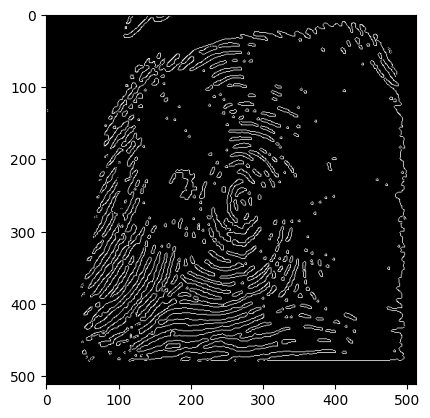

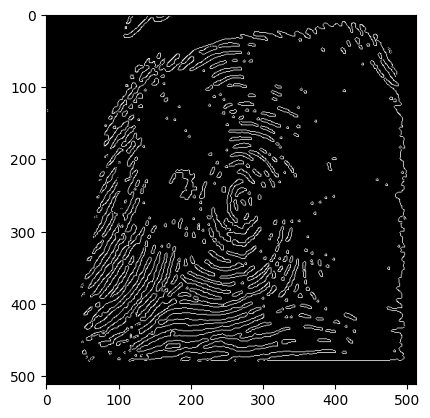

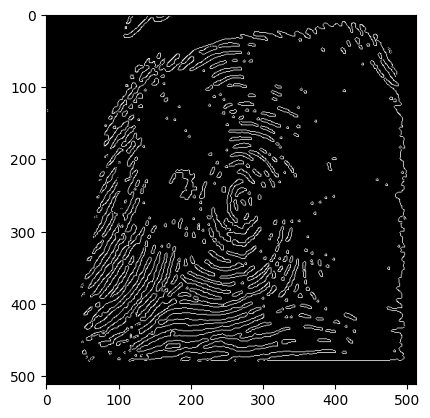

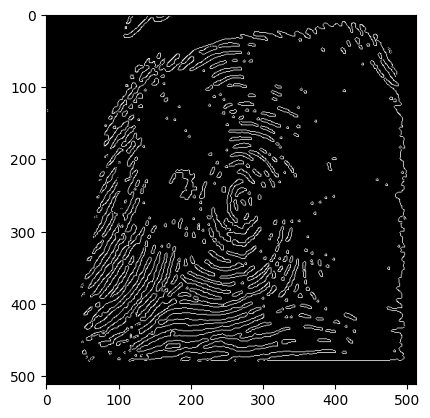

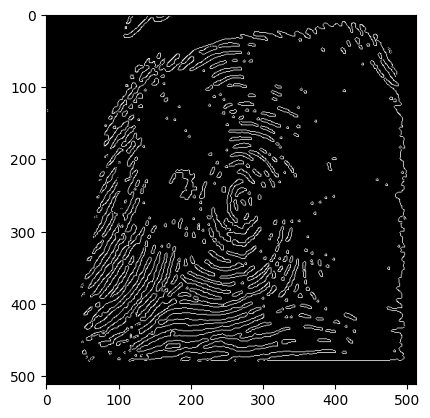

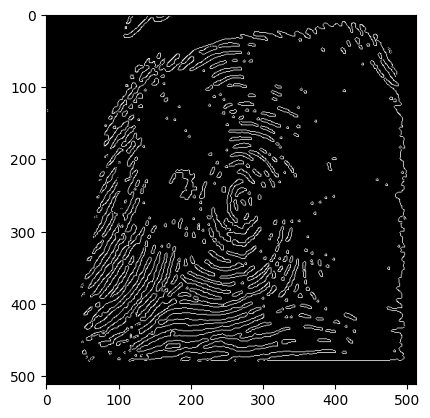

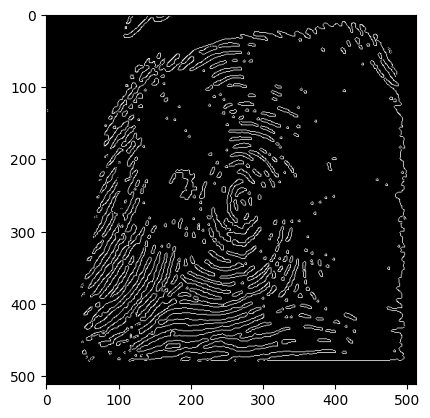

In [60]:
for i, img in enumerate(e_img):
    if i < 10:
        plt.imshow(img, cmap='gray')
        plt.show()

### Second Implementation for preprocess
__Description__

The function `preprocess_image` is used for preprocessing an input image before feeding it into an image processing or computer vision algorithm. The function takes an input image as its argument and performs the following operations:

1. Convert the input image from BGR to grayscale using the `cv2.cvtColor` function.
2. Convert the grayscale image to a binary image using thresholding. It applies an adaptive thresholding algorithm based on Otsu's method, which automatically determines the optimal threshold value for separating foreground pixels from background pixels. The resulting binary image has black pixels representing the background and white pixels representing the foreground objects.
3. Apply morphological operations to the binary image to remove small noise or holes in the foreground region. Specifically, it applies opening morphological operation using an ellipse-shaped structuring element of size 3x3, which consists of erosion followed by dilation. This operation removes small white regions or objects in the binary image without affecting the larger connected components.

The output of the function is the preprocessed image in the form of a binary image with clean foreground objects. This type of image preprocessing is often used in applications such as object detection, segmentation, or feature extraction.

In [61]:
# Preprocessing
def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert image to binary format using thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Apply morphological operations (erosion and dilation)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    processed_image = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    return processed_image

### Edge Extraction
__Description__

The function `extract_edges` takes an input image as its argument and extracts the edges from the image using the Sobel operator, which is a gradient-based edge detection algorithm available in OpenCV library. The function performs the following operations:

1. Apply Sobel operator in both x and y directions to compute the gradients of the image using the `cv2.Sobel` function. The gradients are computed by convolving the image with a kernel that approximates the derivative of the image intensity in each direction. 
2. Compute the gradient magnitude at each pixel by taking the Euclidean distance between the x and y gradients.
3. Apply thresholding to obtain a binary edge map, where the edges are represented by white pixels and non-edges by black pixels. The threshold is set to 0, meaning all pixels with gradient magnitude above 0 will be considered as edges.

The output of the function is a binary image that represents the edges of the input image. This type of edge detection technique is often used in applications such as object detection, feature extraction, or image segmentation.

In [62]:
# Feature Extraction
def extract_edges(image):
    # Apply gradient-based edge extraction (Sobel operator)
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    
    # Apply thresholding to obtain binary edge map
    _, edges = cv2.threshold(gradient_magnitude, 0, 255, cv2.THRESH_BINARY)
    
    return edges

### Processing images with given functions

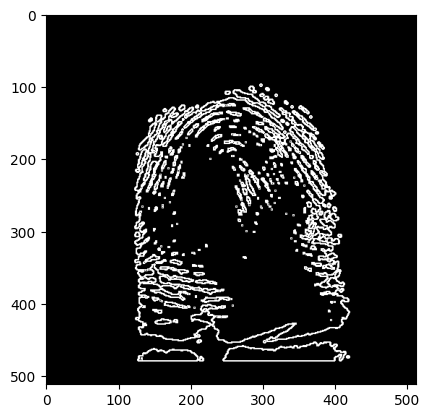

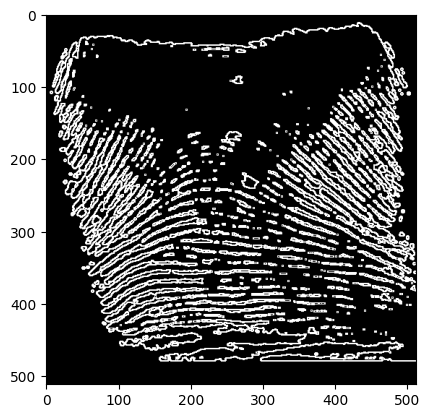

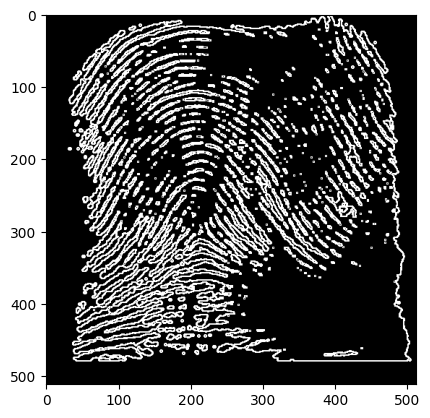

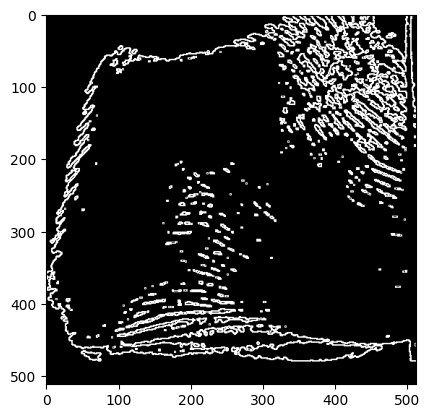

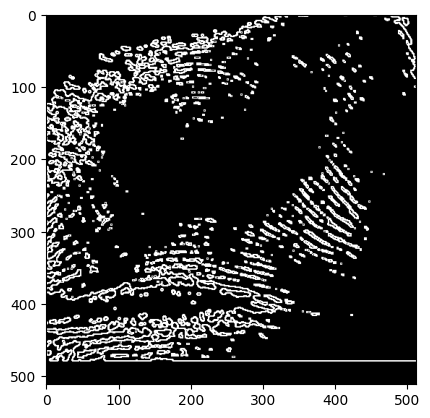

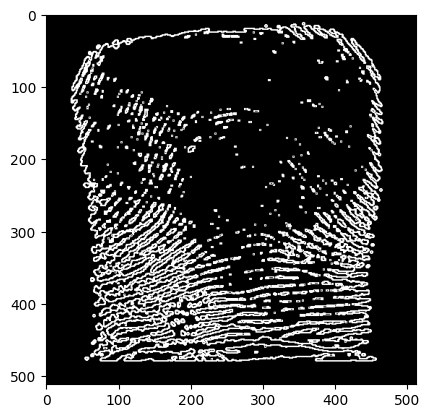

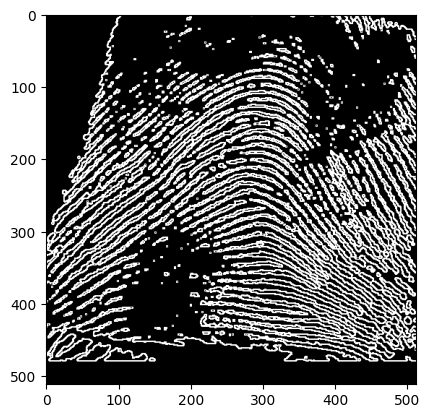

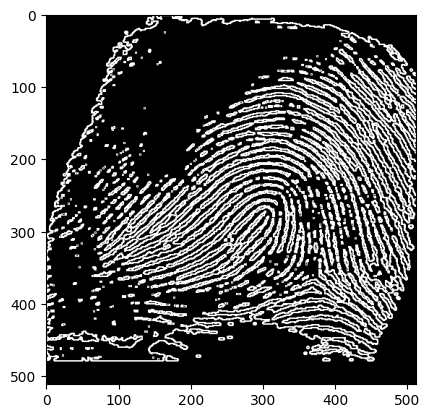

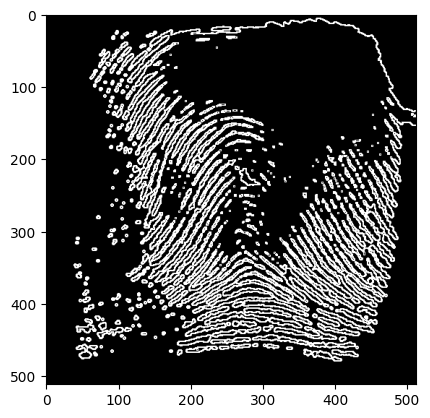

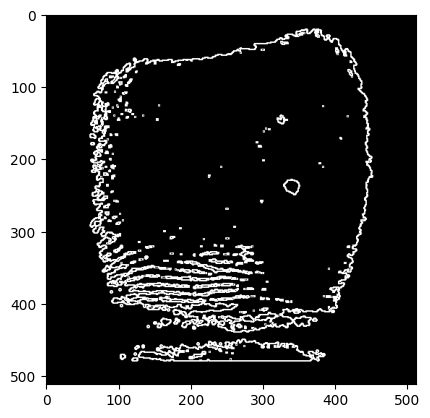

In [68]:
processed_images = []
for i, img in enumerate(imgs):
    if i < 10:
        # Example usage
        image = cv2.imread(img)

        # Preprocess image
        processed_image = preprocess_image(image)

        # Extract edges
        edges = extract_edges(processed_image)
        plt.imshow(edges, cmap='gray')
        plt.show()
    processed_images.append(processed_image)

As you can see, edges are sharper than previous processing

### Rotation Matrix

__Description__

The function `get_rotation_matrix` takes an input image assumed to be a fingerprint as its argument and computes the rotation matrix needed to align the fingerprint vertically. The function performs the following operations:

1. Apply Gaussian blur to the input image to reduce noise using the `cv2.GaussianBlur` function.
2. Apply thresholding to create a binary image from the blurred image using the Otsu's method available with the `cv2.threshold` function.
3. Find contours in the binary image using the `cv2.findContours` function.
4. Find the largest contour which is assumed to be the fingerprint and create a bounding box around it using the `cv2.boundingRect` function.
5. Crop the image to the bounding box region to isolate the fingerprint.
6. Compute the orientation of the fingerprint using the Hu moments, which are a set of seven invariant moments derived from the image intensity distribution. This is done using the `cv2.moments` and `cv2.HuMoments` functions.
7. Compute the rotation matrix using the `cv2.getRotationMatrix2D` function, with the center of the bounding box as the rotation pivot, the angle of rotation equal to the negative arctangent of the second-order moment divided by the first-order moment, and a scaling factor of 1.

The output of the function is the computed rotation matrix M, which can be used to rotate the fingerprint image to the vertical orientation. This type of preprocessing is often used in fingerprint recognition or authentication systems to normalize the orientation of the fingerprints for better matching performance.

In [125]:
def get_rotation_matrix(image):
    
    # apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # apply thresholding to create binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # find the largest contour which is assumed to be the fingerprint
    cnt = max(contours, key=cv2.contourArea)
    
    # create a bounding box around the fingerprint
    x,y,w,h = cv2.boundingRect(cnt)
    
    # crop the image to the bounding box region
    cropped = image[y:y+h, x:x+w]
    
    # compute the orientation of the fingerprint using the Hu moments
    moments = cv2.moments(cnt)
    hu_moments = cv2.HuMoments(moments)
    theta = -np.arctan2(hu_moments[1], hu_moments[0]) * 180 / np.pi
    
    # compute the rotation matrix
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, int(theta), 1.0)
    
    return M

Getting example rotation matrix for testing

In [126]:
for i in range(20):
    M = get_rotation_matrix(processed_images[i])
    print(M)

[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[  0.98480775  -0.17364818  33.72647478]
 [  0.17364818   0.98480775 -27.4953707 ]]
[[  0.93358043  -0.35836795  46.38958268]
 [  0.35836795   0.93358043 -86.29579006]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[   0.82903757   -0.5591929    76.19956983]
 [   0.5591929     0.82903757 -133.2375625 ]]
[[  0.97029573  -0.2419219   58.89173594]
 [  0.2419219    0.97029573 -55.63469924]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]]


As you can see, this approach to classify these fingerprints is not very accurate due to high similarity between different classes of fingerprints.

### Classify a new fingerprint
__Description__

The code performs a fingerprint recognition task using rotation matrices as the features for classification. 

First, five sample fingerprints are selected from different classes and their rotation matrices are calculated using the `get_rotation_matrix` function. The rotation matrices represent the amount of rotation needed to align each fingerprint to a vertical orientation.

Next, a new fingerprint is taken and its rotation matrix is also calculated using the same function. Then, the similarity between the new rotation matrix and each of the sample rotation matrices is computed using the sum of absolute differences between the corresponding elements of the matrices.

Finally, the new fingerprint is assigned to the class with the smallest difference in rotation matrix. This is done by comparing the similarities of the new fingerprint's rotation matrix to each of the sample rotation matrices, and selecting the class that has the smallest similarity.

The output of the code is the predicted class label for the new fingerprint based on its rotation matrix similarity to the sample fingerprints. This type of approach is often used in biometric authentication systems where fingerprints are compared for verification or identification purposes.

In [110]:
# sample fingerprints from different classes
class_1 = processed_images[0]
class_2 = processed_images[1]
class_3 = processed_images[2]
class_4 = processed_images[3]
class_5 = processed_images[9]

# calculate the rotation matrices for each sample fingerprint
M_1 = get_rotation_matrix(class_1)
M_2 = get_rotation_matrix(class_2)
M_3 = get_rotation_matrix(class_3)
M_4 = get_rotation_matrix(class_4)
M_5 = get_rotation_matrix(class_5)

# take a new fingerprint and compare its rotation matrix with others
new_fingerprint = processed_images[1]
M_new = get_rotation_matrix(new_fingerprint)

# compute the similarity between the new rotation matrix and the sample rotation matrices
similarity_1 = np.sum(np.abs(M_new - M_1))
similarity_2 = np.sum(np.abs(M_new - M_2))
similarity_3 = np.sum(np.abs(M_new - M_3))
similarity_4 = np.sum(np.abs(M_new - M_4))
similarity_5 = np.sum(np.abs(M_new - M_5))

# assign the new fingerprint to the class with the smallest difference in rotation matrix
if min(similarity_1, similarity_2, similarity_3, similarity_4, similarity_5) == similarity_1:
    print("New fingerprint belongs to Class T")
elif min(similarity_1, similarity_2, similarity_3, similarity_4, similarity_5) == similarity_2:
    print("New fingerprint belongs to Class R")
elif min(similarity_1, similarity_2, similarity_3, similarity_4, similarity_5) == similarity_3:
    print("New fingerprint belongs to Class L")
elif min(similarity_1, similarity_2, similarity_3, similarity_4, similarity_5) == similarity_4:
    print("New fingerprint belongs to Class W")
else:
    print("New fingerprint belongs to Class A")

New fingerprint belongs to Class T
